# KNNをスクラッチで書く

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 正規分布に沿った乱数を発生させ散布図を作成

Class1~4を作成し色分けを行う。その際に、各点にインデックスを振り分ける

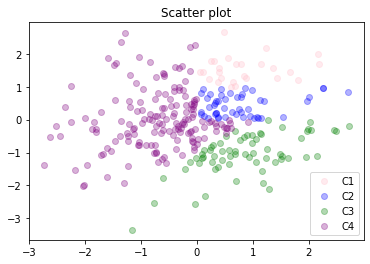

In [2]:
x=np.random.randn(300)
y=np.random.randn(300)

C1x = []
C2x = []
C3x = []
C4x = []
C1y = []
C2y = []
C3y = []
C4y = []

index_list = []

for i,data in enumerate(x):
    if x[i]>0 and y[i]>1:
        C1x.append(x[i])
        C1y.append(y[i])
    elif x[i]>0 and y[i]>0:
        C2x.append(x[i])
        C2y.append(y[i])
    elif x[i]-y[i]>1:
        C3x.append(x[i])
        C3y.append(y[i])
    else:
        C4x.append(x[i])
        C4y.append(y[i])

dataset1 = [[i,j,'1'] for i,j in zip(C1x,C1y)]
dataset2 = [[i,j,'2'] for i,j in zip(C2x,C2y)]
dataset3 = [[i,j,'3'] for i,j in zip(C3x,C3y)]
dataset4 = [[i,j,'4'] for i,j in zip(C4x,C4y)]
dataset = np.vstack((dataset1,dataset2,dataset3,dataset4))        
        
plt.scatter(C1x,C1y,alpha=0.3,c='pink',label='C1')
plt.scatter(C2x,C2y,alpha=0.3,c='blue',label='C2')
plt.scatter(C3x,C3y,alpha=0.3,c='green',label='C3')
plt.scatter(C4x,C4y,alpha=0.3,c='purple',label='C4')
plt.title('Scatter plot')
plt.legend(loc='best')
plt.show()

datasetは、[x座標、y座標、属するクラス]が入っている

In [3]:
dataset[0:3]

array([['0.045481858672184905', '1.4583239345032806', '1'],
       ['0.48676002390183465', '2.655484108269438', '1'],
       ['1.6725091258316678', '1.4517432863007835', '1']], dtype='<U32')

unknown_dataを作成し、★で表記する。

unknown_data: [1.24267646 0.02963605]


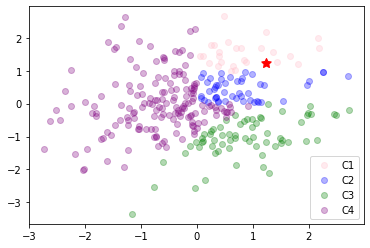

In [4]:
unknown_data = np.random.randn(2)
print("unknown_data:",unknown_data)

plt.scatter(C1x,C1y,alpha=0.3,c='pink',label='C1')
plt.scatter(C2x,C2y,alpha=0.3,c='blue',label='C2')
plt.scatter(C3x,C3y,alpha=0.3,c='green',label='C3')
plt.scatter(C4x,C4y,alpha=0.3,c='purple',label='C4')
plt.scatter(unknown_data[0],unknown_data[0],c='red',s=100, marker=(5, 1))
plt.legend(loc='best')
plt.show()

In [5]:
def kNN(k,u):
    #全サンプルと観測データ間のユークリッド距離を計算する．
    #その際，距離を計算したサンプルのラベルも記憶しておく
    dist_list = []
    label_list = []
    for i,j in enumerate(dataset):
        dist_list.append([np.sqrt((float(j[0])-u[0])**2+(float(j[1])-u[1])**2),j[2]])
        #print("i,j", i, j)
        #print(dist_list[i])

    #距離が小さい順に並べ替える
    dist_list.sort()
    #最近傍サンプルk個でクラス判別のための多数決を行う
    class_label = [0,0,0,0]
    for i in range(k):
        if dist_list[i][1] == '1': 
            class_label[0] += 1
        elif dist_list[i][1] == '2': 
            class_label[1] += 1
        elif dist_list[i][1] == '3': 
            class_label[2] += 1
        elif dist_list[i][1] == '4': 
            class_label[3] += 1

    print("最近傍サンプル",k,"個の内訳 : [ピンク(1),ブルー(2),グリーン(3),パープル(4)] =",class_label)
    print()
    print("kNNによる判別の結果，観測データのクラスラベルは", class_label.index(max(class_label))+1, "です．")

    fig = plt.figure(figsize=(8, 4))
    plt.scatter(C1x,C1y,alpha=0.3,c='pink',label='C1')
    plt.scatter(C2x,C2y,alpha=0.3,c='blue',label='C2')
    plt.scatter(C3x,C3y,alpha=0.3,c='green',label='C3')
    plt.scatter(C4x,C4y,alpha=0.3,c='purple',label='C4')
    plt.scatter(unknown_data[0],unknown_data[1],c='red',s=100, marker=(5, 1))
    plt.show()

最近傍サンプル 5 個の内訳 : [ピンク(1),ブルー(2),グリーン(3),パープル(4)] = [0, 0, 0, 5]

kNNによる判別の結果，観測データのクラスラベルは 4 です．


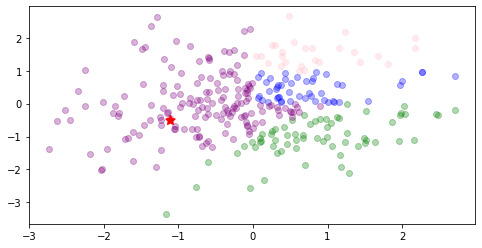

In [6]:
unknown_data = np.random.randn(2)
kNN(5,unknown_data)

### 参考
kNNの説明とその実装　(https://qiita.com/oirom/items/22ccb7c0139dce925f43)